## TEAM PARIS P6 - Sepsis Illness Classification Project

### Introduction/Background
This project aims at **_classifying patients_** who are infected with the **_sepsis illness._**

### Business Understanding
The goal of this project is to predict which patients have sepsis and to determine the likelihood of it beign postitive or negative. 
To build a **_Machine Learning Model_** that **_predicts sepsis_**. Also, build an **_API (Application Programme Interface)**_ and integrate the Model using **_FastAPI_**

### Data Understanding
The datasets (train and test) for this project are in csv formats. The following describes the columns present in the data.

**_ID_**-- number to represent patient ID

**_PRG_**-- Plasma glucose

**_PL_**-- Blood Work Result-1 (mu U/ml)

**_PR_**-- Blood Pressure (mm Hg)

**_SK_**-- Blood Work Result-2 (mm)

**_TS_**-- Blood Work Result-3 (mu U/ml)

**_M11_**-- Body mass index (weight in kg/(height in m)^2

**_BD2_**-- Blood Work Result-4 (mu U/ml)

**_Age_**-- patients age (years)

**_Insurance_**-- If a patient holds a valid insurance card

**_Sepsis_**-- Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise

### Hypothesis & Questions 

*__Null Hypothesis: H0:__* There is no relationship between high Age and sepsis.

*__Alternate Hypothesis: H1:__* There is a relationship between Age and sepsis.




*__Assumptions:__*
1. It was assumed that the blood pressure used was the diastolic type.






*__Questions__*

1. What is the distribution of ages for patients captured in the data?
2. How many of the patients fall under the Normal, Elevated and High Blood Pressure?
3. Is Blood Pressure affected by Age?
4. What is the relationship between Age and Body Mody Mass Index?
5. How many patients are likely to develop sepsis?
6. Which age groups are more prone to developing sepsis?
7. How many patients are under weight, have healthy weight, over weight, obesed and severe obesed?
8. Does having no insurance increase the chances of a patient getting sepsis?
9. What is the relationship between age and blood pressure?


### Importing all relevant libraries and packages

In [60]:
# Data handling
# Data handling
import pandas as pd
import numpy as np

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix , classification_report, f1_score, accuracy_score,\
precision_score, recall_score, fbeta_score, make_scorer, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
#from skopt import BayesSearchCV
from sklearn.utils import class_weight

import scipy.stats as stats

# models 
from sklearn import svm
#from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# model interpretation
#import shap

import pickle
import os
import warnings
warnings.filterwarnings("ignore")

In [61]:
#load preview the dataset
sepsis_data = pd.read_csv("Paitients_Files_Train.csv")
sepsis_data.head()


,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


### Overview Of Dataset
Basic inspection of the dataset

In [62]:
# Listing the columns in the data
sepsis_data.columns.to_list()

['ID',
 'PRG',
 'PL',
 'PR',
 'SK',
 'TS',
 'M11',
 'BD2',
 'Age',
 'Insurance',
 'Sepssis']

In [63]:
# Checking the shape of the data
sepsis_data.shape

(599, 11)

>- **The dataset has 599 rows and 11 columns**

In [64]:
# Checking for more information about the data
sepsis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


>- **It appears all the columns are of numeric data types**

In [65]:
# Checking for missing/null values
sepsis_data.isna().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

>- **There are no missing values in the data**

In [66]:
# Checking for duplicates
sepsis_data.duplicated().sum()

0

>- **There are no duplicates**

In [67]:
# Create a function to print the number of unique values
def print_unique_values(data):
    values = {}
    for col in data.columns:
        number = data[col].nunique()
        print(f'{col}: has {number} of unique values')   

In [68]:
print_unique_values(sepsis_data)

ID: has 599 of unique values
PRG: has 17 of unique values
PL: has 129 of unique values
PR: has 44 of unique values
SK: has 51 of unique values
TS: has 164 of unique values
M11: has 233 of unique values
BD2: has 437 of unique values
Age: has 50 of unique values
Insurance: has 2 of unique values
Sepssis: has 2 of unique values


In [69]:
# Create a function to check if there are zeros in the data
def number_of_zeros(data):
    for col in data.columns:
        if col != 'Sepssis':
            count = (data[col] == 0).sum()
            print(f'Count of zeros in Column  {col} : {count}')

In [70]:
number_of_zeros(sepsis_data)

Count of zeros in Column  ID : 0
Count of zeros in Column  PRG : 93
Count of zeros in Column  PL : 5
Count of zeros in Column  PR : 28
Count of zeros in Column  SK : 175
Count of zeros in Column  TS : 289
Count of zeros in Column  M11 : 9
Count of zeros in Column  BD2 : 0
Count of zeros in Column  Age : 0
Count of zeros in Column  Insurance : 188


>- **Although there were no null values in the columns, some of the columns had 0's in the them**

In [71]:
# checking the column headers
sepsis_data.columns

Index(['ID', 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepssis'],
      dtype='object')

>- **The above cell displays the column names, however they are not descriptive enough**

#### Rename the columns

In [72]:
sepsis_data = sepsis_data.rename(columns={'PRG': 'Plasma Glucose', 'PL': 'Blood Work Result-1',
                        'PR': 'Blood Pressure','SK': 'Blood Work Result-2',
                        'TS': 'Blood Work Result-3', 'M11': 'Body Mass Index',
                        'BD2': 'Blood Work Result-4', 'Sepssis': 'Sepsis'})

In [73]:
# Checking the rename of columns
sepsis_data.head()

,ID,Plasma Glucose,Blood Work Result-1,Blood Pressure,Blood Work Result-2,Blood Work Result-3,Body Mass Index,Blood Work Result-4,Age,Insurance,Sepsis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


>- **Columns were successfully renamed and are now descriptive**

In [74]:
# Checking the statistics of the data
sepsis_data.describe()

,Plasma Glucose,Blood Work Result-1,Blood Pressure,Blood Work Result-2,Blood Work Result-3,Body Mass Index,Blood Work Result-4,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


>- **The mean age for the patients captured is 33.29. The mean blood pressure is 68.732888 mm hg which is lower than 80 mm hg, hence indicates that the patients had averagely a normal pressure**

#### Check the correlation between the various columns

In [75]:
# Find the correlation between the columns
corr_matrix = sepsis_data.corr()
corr_matrix

,Plasma Glucose,Blood Work Result-1,Blood Pressure,Blood Work Result-2,Blood Work Result-3,Body Mass Index,Blood Work Result-4,Age,Insurance
Plasma Glucose,1.000000,0.139541,0.116680,-0.080902,-0.054812,0.033482,-0.052230,0.532545,0.084631
Blood Work Result-1,0.139541,1.000000,0.143064,0.054430,0.339818,0.215949,0.144665,0.274057,0.050993
Blood Pressure,0.116680,0.143064,1.000000,0.197535,0.095281,0.269482,0.008318,0.225625,-0.025365
Blood Work Result-2,-0.080902,0.054430,0.197535,1.000000,0.429068,0.377950,0.176592,-0.121553,-0.017360
Blood Work Result-3,-0.054812,0.339818,0.095281,0.429068,1.000000,0.184747,0.218313,-0.011523,0.041560
Body Mass Index,0.033482,0.215949,0.269482,0.377950,0.184747,1.000000,0.127675,0.046117,0.026826
Blood Work Result-4,-0.052230,0.144665,0.008318,0.176592,0.218313,0.127675,1.000000,0.033567,0.006114
Age,0.532545,0.274057,0.225625,-0.121553,-0.011523,0.046117,0.033567,1.000000,0.054368
Insurance,0.084631,0.050993,-0.025365,-0.017360,0.041560,0.026826,0.006114,0.054368,1.000000


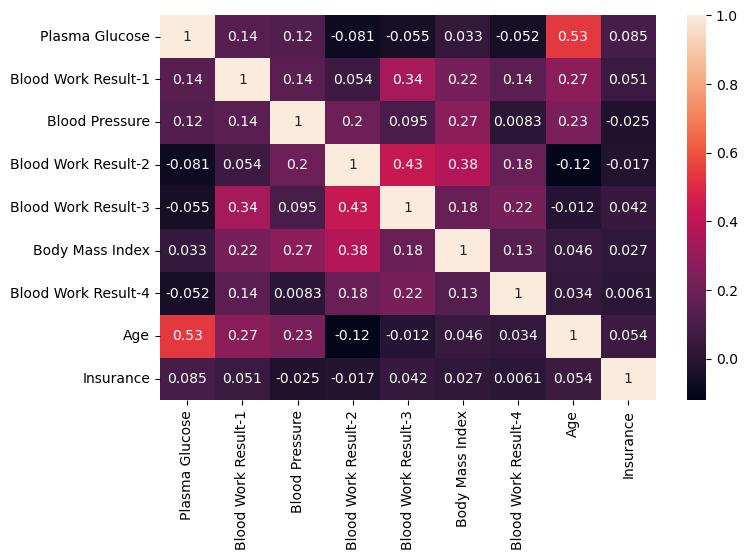

In [76]:
# Plot a heatmap for the correlations
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True)
plt.show();

In [77]:
# get the minimum value
min_corr = corr_matrix.min().min()  
# get the columns involved
min_corr_cols = corr_matrix.unstack().idxmin()

print('The minimum correlation was:', min_corr)
print('The columns involved are:', min_corr_cols)

The minimum correlation was: -0.12155329275228288
The columns involved are: ('Blood Work Result-2', 'Age')


In [78]:
# get the minimum value
max_corr = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
            .max().max())  

# get the maximum value (excluding same columns)
# get the columns involved
max_corr_cols = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
                 .stack().idxmax()) 

print('The maximun correlation was:', max_corr)
print('The columns involved are:', max_corr_cols)

The maximun correlation was: 0.5325446086908504
The columns involved are: ('Plasma Glucose', 'Age')


>- **The lowest correlation is -0.12155329275228288 between Blood Work Result-2 and Age.** 

>- **The highest correlation is 0.5325446086908504 between Plasma Glucose and Age**

### Hypothesis Testing

In [79]:
# Select the Age and Sepsis columns from the dataset
age = sepsis_data['Age']
sepsis = (sepsis_data['Sepsis'] == 'Positive').astype(bool).astype(int)

# Perform correlation analysis
correlation, p_value = stats.pearsonr(age, sepsis)

# Print the correlation coefficient and p-value
print("Correlation coefficient:", correlation)
print("P-value:", p_value)

if p_value > 0.05:
    print('Fail to reject the null hypothesis. ')
else:
    print('Reject the null hypothesis')


Correlation coefficient: 0.2102342858235142
P-value: 2.0718778891887102e-07
Reject the null hypothesis


### Univariate Anlaysis